## Load Experiment Data

In [2]:
# Load the policy
import os
import pandas
from garage.experiment import Snapshotter
import pandas as pd
EXPERIMENT_NAME = "CL_point_env"
experiment_dir = os.path.join("data/local/experiment", EXPERIMENT_NAME)
snapshotter = Snapshotter()
data = snapshotter.load(experiment_dir)
policy = data['algo'].policy

# You can also access other components of the experiment
env = data['env']

progress_csv_path = os.path.join(experiment_dir, 'progress.csv')
progress_df = pd.read_csv(progress_csv_path)

2025-01-07 11:10:08.681676: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.




Failed to import TF-Keras. Please note that TF-Keras is not installed by default when you install TensorFlow Probability. This is so that JAX-only users do not have to install TensorFlow or TF-Keras. To use TensorFlow Probability with TensorFlow, please install the tf-keras or tf-keras-nightly package.
This can be be done through installing the tensorflow-probability[tf] extra.




Failed to import TF-Keras. Please note that TF-Keras is not installed by default when you install TensorFlow Probability. This is so that JAX-only users do not have to install TensorFlow or TF-Keras. To use TensorFlow Probability with TensorFlow, please install the tf-keras or tf-keras-nightly package.
This can be be done through installing the tensorflow-probability[tf] extra.




/Users/paulnitschke/Desktop/projects/geo_meta_rl/garage/experiment/deterministic.py:36: UserWarning: Enabeling deterministic mode in PyTorch can have a performance impact when using GPU.
  warnings.warn(


In [3]:
num_train_tasks=2
from garage.experiment.task_sampler import SetTaskSampler
from garage.envs import GymEnv, normalize
from garage.envs.point_env import PointEnv
from garage.torch.algos.CLMeta import PEARLWorker

worker_args = dict(deterministic=True, accum_context=True)
env_sampler = SetTaskSampler(
    PointEnv,
    wrapper=lambda env, _: normalize(
        env))
env = env_sampler.sample(num_train_tasks)

In [8]:
from garage.experiment.meta_evaluator import MetaEvaluator

meta_evaluator = MetaEvaluator(test_tasks=env,
                               worker_class=PEARLWorker,
                               worker_args=worker_args,
                               n_test_tasks=2)

trajs = meta_evaluator.evaluate(algo=data['algo'])



Failed to import TF-Keras. Please note that TF-Keras is not installed by default when you install TensorFlow Probability. This is so that JAX-only users do not have to install TensorFlow or TF-Keras. To use TensorFlow Probability with TensorFlow, please install the tf-keras or tf-keras-nightly package.
This can be be done through installing the tensorflow-probability[tf] extra.




/Users/paulnitschke/Desktop/projects/geo_meta_rl/garage/experiment/deterministic.py:36: UserWarning: Enabeling deterministic mode in PyTorch can have a performance impact when using GPU.
  warnings.warn(
/Users/paulnitschke/miniconda3/envs/env_geo_meta_rl/lib/python3.9/site-packages/torch/distributions/distribution.py:53: UserWarning: <class 'garage.torch.distributions.tanh_normal.TanhNormal'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(
/Users/paulnitschke/miniconda3/envs/env_geo_meta_rl/lib/python3.9/site-packages/torch/distributions/distribution.py:53: UserWarning: <class 'garage.torch.distributions.tanh_normal.TanhNormal'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(
/Users/paulnitschke/Desktop/projects/geo_meta_rl/garage/_dtypes.py:1049: U

Text(0.5, 1.0, 'Trajectories of Task 1 and Task 2')

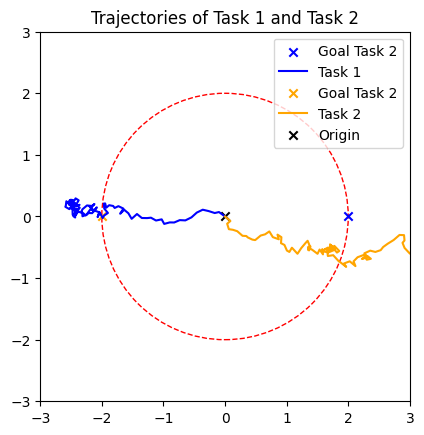

In [5]:
task_1_trajs, task_2_trajs = trajs

import matplotlib.pyplot as plt
plt.gca().set_aspect('equal', adjustable='box')
circle = plt.Circle((0, 0), 2, color='r', fill=False, linestyle='--')
plt.gca().add_artist(circle)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(task_1_trajs.env_infos["task"][0]["goal"][0], task_1_trajs.env_infos["task"][0]["goal"][1], color='blue', marker='x', label='Goal Task 2')
plt.plot(task_1_trajs.observations[:,0], task_1_trajs.observations[:,1], label="Task 1", color="blue")
plt.scatter(task_2_trajs.env_infos["task"][0]["goal"][0], task_2_trajs.env_infos["task"][0]["goal"][1], color='orange', marker='x', label='Goal Task 2')
plt.plot(task_2_trajs.observations[:,0], task_2_trajs.observations[:,1], label="Task 2", color="orange")
plt.scatter(0, 0, color='black', marker='x', label='Origin')
plt.legend()
plt.title("Trajectories of Task 1 and Task 2")

## Visualizing Learned Q-Functions

In [38]:
dir(data["algo"])
qf1 = data["algo"]._qf1
qf2 = data["algo"]._qf2

task_1_trajs

/Users/paulnitschke/Desktop/projects/geo_meta_rl/garage/_dtypes.py:1049: UserWarning: Observation array([0., 0., 2.]) is outside observation_space Box(-inf, inf, (3,), float32)
  warnings.warn(


EpisodeBatch(env_spec=EnvSpec(input_space=Box(-0.1, 0.1, (2,), float32), output_space=Box(-inf, inf, (3,), float32), max_episode_length=100), episode_infos={}, observations=array([[ 0.        ,  0.        ,  2.        ],
       [-0.1       ,  0.1       ,  2.10237961],
       [-0.2       ,  0.2       ,  2.20907221],
       [-0.3       ,  0.3       ,  2.31948271],
       [-0.40000001,  0.40000001,  2.43310502],
       [-0.50000001,  0.50000001,  2.54950977],
       [-0.60000001,  0.60000001,  2.66833282],
       [-0.70000001,  0.70000001,  2.78926515],
       [-0.80000001,  0.80000001,  2.91204397],
       [-0.90000001,  0.90000001,  3.03644531],
       [-1.00000001,  1.00000001,  3.16227768],
       [-1.10000002,  1.10000002,  3.28937686],
       [-1.20000002,  1.20000002,  3.41760152],
       [-1.30000002,  1.30000002,  3.5468296 ],
       [-1.40000002,  1.40000002,  3.67695529],
       [-1.50000002,  1.50000002,  3.80788658],
       [-1.60000002,  1.60000002,  3.93954315],
       [-1.